## MOVIE RATING PREDICTION

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
df=pd.read_csv("movie.csv")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [45]:
df.tail(30)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15479,Zindagi Tumse,(2019),120 min,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15480,Zindagi Unlimited,(2021),105 min,NaN,NaN,NaN,Vipin Agnihotri,Amit Pandey,Kanchi Rohela,Kritika Sanghavi
15481,Zindagi Ya Toofan,(1958),NaN,Drama,6.3,7,Nakhshab Jarchavi,Pradeep Kumar,Minoo Mumtaz,Nutan
15482,Zindagi Zindabad,(2000),140 min,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15483,Zindagi Zindagi,(1972),NaN,"Drama, Romance",6.5,20,Tapan Sinha,Sunil Dutt,Waheeda Rehman,Ashok Kumar
15484,Zinga,(2021),NaN,"Adventure, Fantasy, Sci-Fi",NaN,NaN,Jaishankar Chigurula,Sri Ram,Devan Sanjeev,Kasu Naveen Kumar
15485,Zingaro,(1963),NaN,NaN,NaN,NaN,Chandrakant,Bela Bose,Laxmi Chhaya,Aruna Irani
15486,Zingaro,(1935),NaN,NaN,NaN,NaN,S.N. Bhende,Pushpa,NaN,NaN
15487,Zokkomon,(2011),109 min,"Action, Adventure, Family",4.0,351,Satyajit Bhatkal,Darsheel Safary,Anupam Kher,Manjari Fadnnis
15488,Zoo,(2018),100 min,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta


In [29]:
df.shape

(1000, 7)

In [47]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [55]:
df['Rating']

0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Name: Rating, Length: 15509, dtype: float64

In [57]:
df['Rating'].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

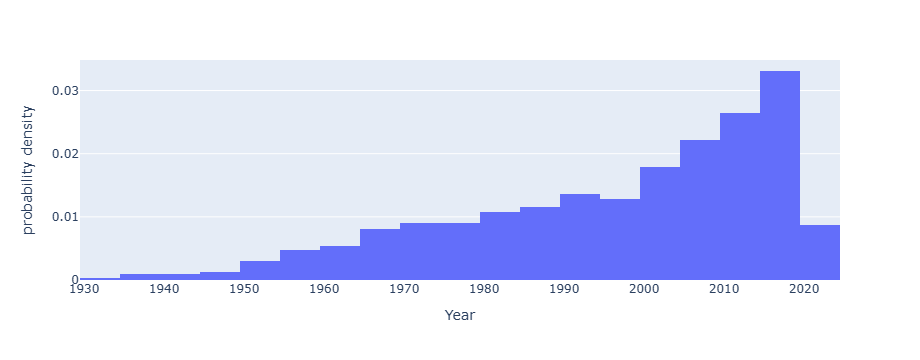

In [416]:
year=px.histogram(df,x='Year',histnorm='probability density',nbins=30)
year.show()

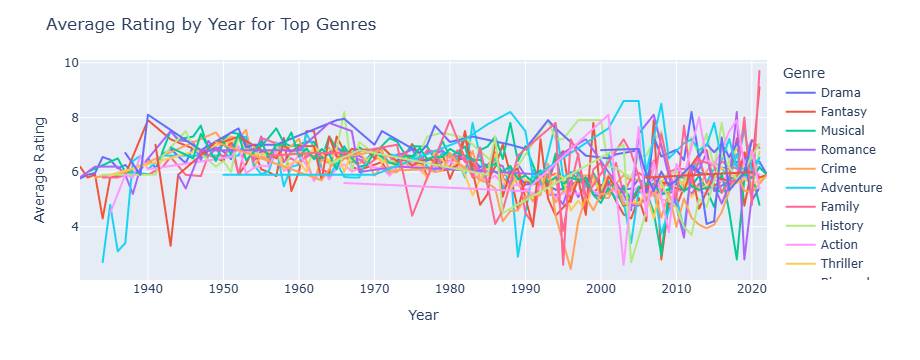

In [424]:
avg_rating_by_year=df.groupby(['Year','Genre'])['Rating'].mean().reset_index()
top_genres=df['Genre'].value_counts().head(10).index
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]
fig = px.line(avg_rating_by_year, x='Year', y='Rating', color = 'Genre')
fig.update_layout(title='Average Rating by Year for Top Genres', xaxis_title='Year', yaxis_title='Average Rating')
fig.show()

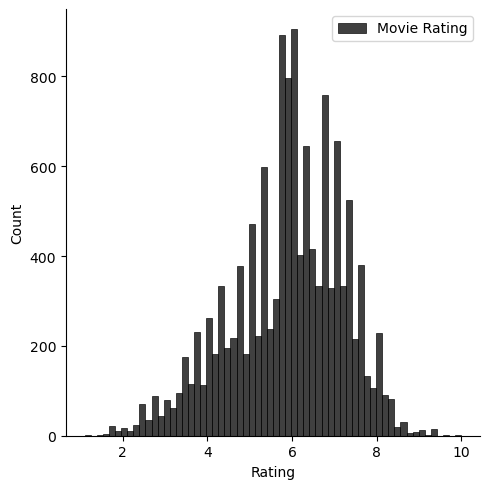

In [479]:
sns.displot(df['Rating'],label="Movie Rating",color='black')
plt.legend()

## MOVIE RATING BELOW 5

In [482]:
mvratingbelow_5=df[df['Rating']<5.0]
mvratingbelow_5

,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_mean_rating,Actor1_mean_rating,Actor2_mean_rating,Actor3_mean_rating
3,2019,110,Comedy,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.760421,4.400000,5.250000,4.400000,4.460000
3,2019,110,Romance,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.815400,4.400000,5.250000,4.400000,4.460000
5,1997,147,Comedy,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.760421,5.335135,4.793617,5.730000,5.930000
5,1997,147,Drama,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.041903,5.335135,4.793617,5.730000,5.930000
5,1997,147,Musical,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.231555,5.335135,4.793617,5.730000,5.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,1998,157,Action,4.3,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji,5.544753,4.394737,5.025547,4.964000,5.741667
15490,1998,157,Drama,4.3,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji,6.041903,4.394737,5.025547,4.964000,5.741667
15490,1998,157,Thriller,4.3,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji,5.667303,4.394737,5.025547,4.964000,5.741667
15505,1999,129,Action,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.544753,5.175000,5.445116,4.603704,5.763158


## MOVIE RATING GREATER THAN 5

In [83]:
mvratinggreater_5=df[df['Rating']>5.0]
mvratinggreater_5

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth


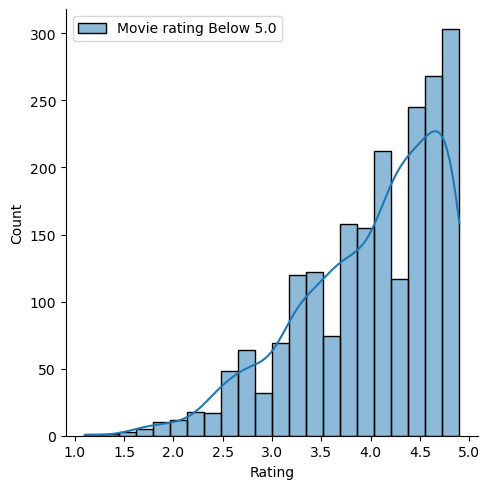

In [89]:
sns.displot(mvratingbelow_5.Rating,label='Movie rating Below 5.0',kde=True)
plt.legend()

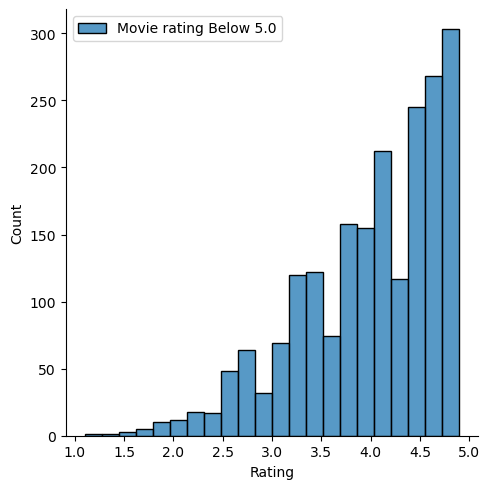

In [93]:
sns.displot(mvratingbelow_5.Rating,label='Movie rating Below 5.0',kde=False)
plt.legend()

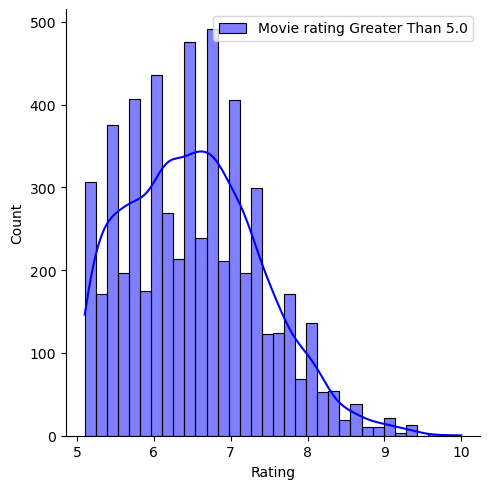

In [485]:
sns.displot(mvratinggreater_5.Rating,label='Movie rating Greater Than 5.0',kde=True,color='blue')
plt.legend()

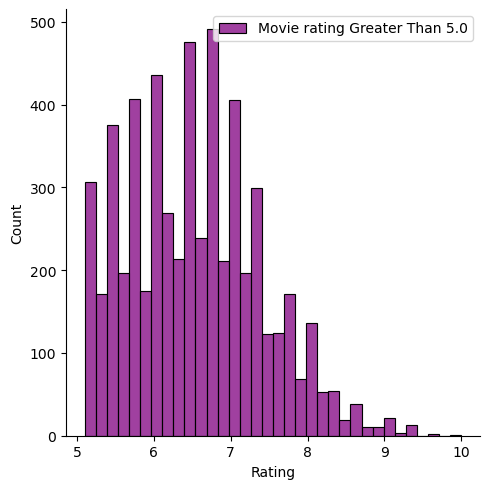

In [101]:
sns.displot(mvratinggreater_5.Rating,label='Movie rating Greater Than 5.0',kde=False,color='purple')
plt.legend()

In [152]:
df['Genre']

0                  Drama
1                  Drama
2         Drama, Musical
3        Comedy, Romance
4                  Drama
              ...       
15504             Action
15505      Action, Drama
15506             Action
15507             Action
15508      Action, Drama
Name: Genre, Length: 15509, dtype: object

In [150]:
drama=df[df['Genre']=='Drama']
drama

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
27,13 Tribute of Love,(2020),66 min,Drama,NaN,NaN,Rahul Tiwari,Rahul Tiwari Adhiyari,Anil Arora,Asima Bhatt
...,...,...,...,...,...,...,...,...,...,...
15481,Zindagi Ya Toofan,(1958),NaN,Drama,6.3,7,Nakhshab Jarchavi,Pradeep Kumar,Minoo Mumtaz,Nutan
15482,Zindagi Zindabad,(2000),140 min,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15488,Zoo,(2018),100 min,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana


In [154]:
comedy=df[df['Genre']=='Comedy']
comedy

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
29,14 Phere,(2021),NaN,Comedy,NaN,NaN,Devanshu Singh,Vikrant Massey,Kriti Kharbanda,Gauahar Khan
45,1982 - A Love Marriage,(2017),113 min,Comedy,5.5,106,Prashant Gore,Amitkumar Sharma,Omna,Rita Agarwal
47,2 Band Radio,(2019),NaN,Comedy,NaN,NaN,Saki Shah,Bilal Ahamad Bhagat,Neelu Dogra,Rahat Kazmi
58,2016 the End,(2017),130 min,Comedy,6.1,94,Jaideep Chopra,Divyendu Sharma,Kiku Sharda,Harshad Chopda
72,3 Days 4 Nights in Bihar,(2020),NaN,Comedy,NaN,NaN,Abhishek Dogra,Jackky Bhagnani,Sharman Joshi,Ruslaan Mumtaz
...,...,...,...,...,...,...,...,...,...,...
15233,Yeh Hai Lollipop,(2016),NaN,Comedy,6.0,35,Manoj Sharma,Om Puri,Chirag Thakkar,Shilpa Anand
15288,Yeh Suhaagraat Impossible,(2019),92 min,Comedy,8.6,500,Abhinav Thakur,Preetika Chauhan,Aarav Mavi,Aloknath Pathak
15361,Zakir Khan Live,(2017),NaN,Comedy,7.6,15,Zakir Khan,NaN,NaN,NaN
15416,Zed Plus,(2014),141 min,Comedy,6.4,449,Chandra Prakash Dwivedi,Vinod Acharya,Rajeev Ankit,Adil Hussain


In [156]:
action=df[df['Genre']=='Action']
action

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
26,13 May Gulaabi Nagar,(2010),NaN,Action,NaN,NaN,N.K. Pareek,Nirmal Pandey,Khushi Rajpoot,Raj Singh Verma
34,18.11,(2014),126 min,Action,3.5,10,Mohibul Haque,Rehal Khan,Gulshan Grover,Mukesh Tiwari
101,5 Rifles,(2001),NaN,Action,NaN,NaN,Hemant Birje,Anu Kashyap,Raza Murad,Paintal
114,7 Bijliyaan,(1988),126 min,Action,5.0,7,Raju Saigal,Tina Ambani,Shoma Anand,Krishan Dhawan
129,9 O' Clock,(2017),124 min,Action,5.3,9,Amrit Raj Thakur,Arun Bakshi,Ajeet Goswami,Rohit Rajawat
...,...,...,...,...,...,...,...,...,...,...
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN


In [158]:
romance=df[df['Genre']=='Romance']
romance

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
156,A New Love Ishtory,(2013),140 min,Romance,6.0,80,John Mathew Matthan,Raqesh Bapat,Gurpreet Kaur Chadha,Smita Jaykar
185,Aabroo,(1956),NaN,Romance,NaN,NaN,Chaturbhuj Doshi,Kamini Kaushal,Kishore Kumar,Madan Puri
223,Aafreen,(2021),NaN,Romance,NaN,NaN,Manjeet Rai,Chitransh Raaj,Prishita Tiwari,Sapna Shetty
250,Aage Badho,(1972),NaN,Romance,NaN,NaN,I.S. Johar,Dilip Dutt,Ambika Johar,Rajeev Kumar
278,Aaj Jaana Hai Ke Pyaar Kya Ha,(2004),NaN,Romance,NaN,NaN,Vikram Naaru,Arun Bakshi,Bharat Kapoor,Shakti Kapoor
...,...,...,...,...,...,...,...,...,...,...
15334,Zabardast,(2008),NaN,Romance,4.5,8,Prawaal Raman,Ishrat Ali,Ninad Kamat,Priyanka Kothari
15412,Zarina,(1956),NaN,Romance,NaN,NaN,NaN,NaN,NaN,NaN
15460,Zindagi,(2000),118 min,Romance,2.8,8,Suraj Prakash,Vicky Bhalla,Gayatri,Deepak Jethi
15465,Zindagi Aur Khwab,(1961),NaN,Romance,6.9,31,S. Bannerjee,Rajendra Kumar,Meena Kumari,Jayant


In [160]:
music=df[df['Genre']=='Musical']
music

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
174,A.R Rahman Encore Tour,(2017),NaN,Musical,NaN,NaN,Deepak Gattani,A.R. Rahman,NaN,NaN
431,Aap Jaisa Koi,(2003),NaN,Musical,NaN,NaN,Ruslaan Mumtaz,NaN,NaN,NaN
511,Aavartan,(2021),116 min,Musical,NaN,NaN,Durba Sahay,Sushma Seth,Shovana Narayan,Sunit Razdan
990,Anar,(1991),NaN,Musical,NaN,NaN,K.K. Shahi,Sachin Pilgaonkar,Ashok Saraf,Rina Sharma
1089,Anjana Ishq,NaN,NaN,Musical,NaN,NaN,Sanjeev Trigunayat,Ranjeet,Shakti Kapoor,Arun Bakshi
1802,Bandagi,(1972),NaN,Musical,NaN,NaN,K. Shankar,Gemini Balu,Indira Bansal,Birbal
1875,Bare Bhaiyya,(1951),NaN,Musical,NaN,NaN,Aspi Irani,Lala Yaqoob,Agha,Nirupa Roy
1896,Barsaat Ki Raat,(1998),151 min,Musical,3.7,12,Bharat Kapoor,Dharmendra,Dinesh Hingoo,Shafi Inamdar
2054,Bewaqoof,(1960),160 min,Musical,5.2,35,I.S. Johar,Kishore Kumar,Mala Sinha,I.S. Johar
2108,Bhai Bahen,(1950),NaN,Musical,NaN,NaN,Ram Daryani,Geeta Bali,Bharat Bhushan,Jeevan


In [164]:
pd.crosstab(df['Rating'],df['Year'])

Year,(1917),(1931),(1932),(1933),(1934),(1935),(1936),(1937),(1938),(1939),...,(2012),(2013),(2014),(2015),(2016),(2017),(2018),(2019),(2020),(2021)
Rating,,,,,,,,,,,,,,,,,,,,,
1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1.7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1.8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,1,4
9.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
9.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [168]:
pd.crosstab(df['Rating'],df['Genre'])

Genre,Action,"Action, Adventure","Action, Adventure, Biography","Action, Adventure, Comedy","Action, Adventure, Crime","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, History","Action, Adventure, Horror",...,"Romance, Thriller, Mystery",Sci-Fi,"Sci-Fi, Thriller",Sport,Thriller,"Thriller, Action","Thriller, Musical, Mystery","Thriller, Mystery","Thriller, Mystery, Family",War
Rating,,,,,,,,,,,,,,,,,,,,,
1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.7,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

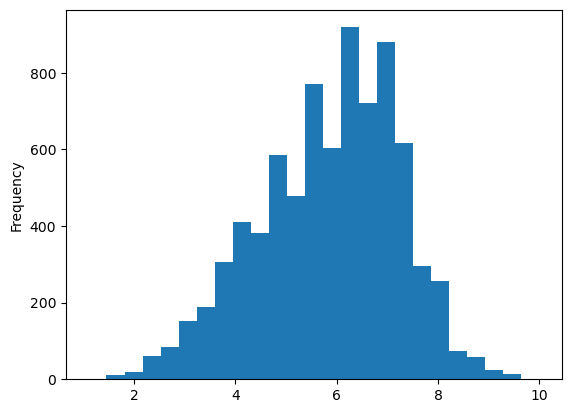

In [207]:
df.Rating.plot.hist(bins=25)

# Filling Missing Values

In [210]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [212]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

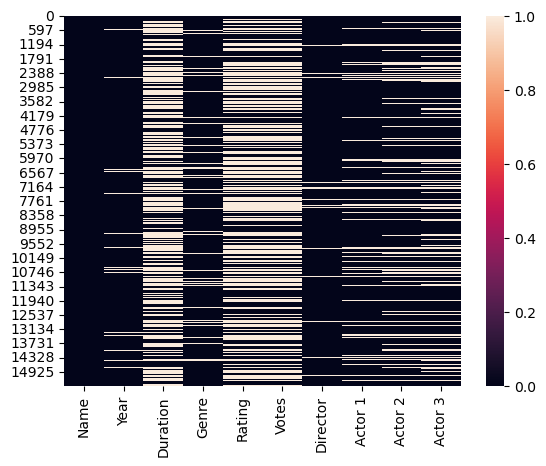

In [216]:
sns.heatmap(df.isnull())

In [218]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [230]:
df.drop(['Duration'],axis=1,inplace=False)

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),Action,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
df['Rating'].mean()

5.841621416845562

In [238]:
df['Rating'].median()

6.0

In [240]:
df['Rating'].mode()

0    6.2
Name: Rating, dtype: float64

In [242]:
df['Rating'].isnull().sum()

7590

In [256]:
ran_rating=np.random.uniform(5.8,6.0,7590)
ran_rating=np.round(ran_rating,1)
ran_rating

array([5.8, 5.8, 5.9, ..., 5.9, 6. , 5.9])

In [258]:
rating_copy=df['Rating'].copy()
rating_copy

0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Name: Rating, Length: 15509, dtype: float64

In [260]:
rating_copy[np.isnan(rating_copy)]=ran_rating
rating_copy

0        5.8
1        7.0
2        5.8
3        4.4
4        5.9
        ... 
15504    4.6
15505    4.5
15506    6.0
15507    5.9
15508    6.2
Name: Rating, Length: 15509, dtype: float64

In [269]:
df['Rating']=rating_copy

In [271]:
df['Rating'].isnull().sum()

0

In [283]:
df['Votes'].isnull().sum()

7589

In [315]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [328]:
df

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.9,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [428]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [430]:
df.drop('Name',axis=1,inplace=True)

In [434]:
genre_mean_rating =df.groupby('Genre')['Rating'].transform("mean")
df['Genre_mean_rating']=genre_mean_rating
director_mean_rating =df.groupby('Director')['Rating'].transform("mean")
df['Director_mean_rating']=director_mean_rating
actor1_mean_rating =df.groupby('Actor 1')['Rating'].transform("mean")
df['Actor1_mean_rating']=actor1_mean_rating
actor2_mean_rating =df.groupby('Actor 2')['Rating'].transform("mean")
df['Actor2_mean_rating']=actor2_mean_rating
actor3_mean_rating =df.groupby('Actor 3')['Rating'].transform("mean")
df['Actor3_mean_rating']=actor3_mean_rating

In [439]:
X=df[['Year','Duration','Genre_mean_rating','Director_mean_rating','Actor1_mean_rating','Actor2_mean_rating',
      'Actor3_mean_rating']]
X

,Year,Duration,Genre_mean_rating,Director_mean_rating,Actor1_mean_rating,Actor2_mean_rating,Actor3_mean_rating
1,2019,109,6.041903,7.000000,6.850000,7.000000,7.000000
2,2021,90,6.041903,5.800000,6.400000,5.900000,5.800000
2,2021,90,6.231555,5.800000,6.400000,5.900000,5.800000
3,2019,110,5.760421,4.400000,5.250000,4.400000,4.460000
3,2019,110,5.815400,4.400000,5.250000,4.400000,4.460000
...,...,...,...,...,...,...,...
15503,1989,125,6.041903,6.290476,6.377419,5.800000,6.011765
15505,1999,129,5.544753,5.175000,5.445116,4.603704,5.763158
15505,1999,129,6.041903,5.175000,5.445116,4.603704,5.763158
15508,1998,130,5.544753,4.090625,6.045128,5.632558,5.780000


In [445]:
model=LinearRegression()
model.fit(X_train,y_train)
model_pred=model.predict(X_test)

In [459]:
print("The preformance of logistic regression is below:\n")
print("Mean squared :  ",mean_squared_error(y_test,model_pred))
print("Mean absolute error:  ",mean_absolute_error(y_test,model_pred))
print("R2 Score :  ",r2_score(y_test,model_pred))

The preformance of logistic regression is below:

Mean squared :   0.4060467373305314
Mean absolute error:   0.4640817631586361
R2 Score :   0.7607256590337381


In [461]:
X.head(10)

,Year,Duration,Genre_mean_rating,Director_mean_rating,Actor1_mean_rating,Actor2_mean_rating,Actor3_mean_rating
1,2019,109,6.041903,7.000000,6.850000,7.000000,7.000000
2,2021,90,6.041903,5.800000,6.400000,5.900000,5.800000
2,2021,90,6.231555,5.800000,6.400000,5.900000,5.800000
3,2019,110,5.760421,4.400000,5.250000,4.400000,4.460000
3,2019,110,5.815400,4.400000,5.250000,4.400000,4.460000
4,2010,105,6.041903,6.708333,6.912500,6.082353,5.420000
5,1997,147,5.760421,5.335135,4.793617,5.730000,5.930000
5,1997,147,6.041903,5.335135,4.793617,5.730000,5.930000
5,1997,147,6.231555,5.335135,4.793617,5.730000,5.930000
6,2005,142,6.041903,7.407143,5.456863,6.828571,6.671429


In [463]:
X.tail(10)

,Year,Duration,Genre_mean_rating,Director_mean_rating,Actor1_mean_rating,Actor2_mean_rating,Actor3_mean_rating
15494,2001,153,6.676613,7.187500,4.168421,5.793750,5.973333
15494,2001,153,6.041903,7.187500,4.168421,5.793750,5.973333
15494,2001,153,6.747009,7.187500,4.168421,5.793750,5.973333
15503,1989,125,5.544753,6.290476,6.377419,5.800000,6.011765
15503,1989,125,5.824838,6.290476,6.377419,5.800000,6.011765
15503,1989,125,6.041903,6.290476,6.377419,5.800000,6.011765
15505,1999,129,5.544753,5.175000,5.445116,4.603704,5.763158
15505,1999,129,6.041903,5.175000,5.445116,4.603704,5.763158
15508,1998,130,5.544753,4.090625,6.045128,5.632558,5.780000
15508,1998,130,6.041903,4.090625,6.045128,5.632558,5.780000


In [465]:
Y.head(20)

1     7.0
2     5.8
2     5.8
3     4.4
3     4.4
4     5.9
5     4.7
5     4.7
5     4.7
6     7.4
6     7.4
6     7.4
8     5.6
8     5.6
8     5.6
9     4.0
9     4.0
9     4.0
10    6.2
11    5.9
Name: Rating, dtype: float64

In [467]:
Y.tail(20)

15487    4.0
15487    4.0
15488    5.7
15490    4.3
15490    4.3
15490    4.3
15492    5.6
15492    5.6
15492    5.6
15493    6.1
15494    6.2
15494    6.2
15494    6.2
15503    5.8
15503    5.8
15503    5.8
15505    4.5
15505    4.5
15508    6.2
15508    6.2
Name: Rating, dtype: float64

In [371]:
df['Year']=df['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [373]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace('min',''))

In [375]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13118 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      13118 non-null  object 
 1   Year      13118 non-null  int32  
 2   Duration  13118 non-null  int64  
 3   Genre     13118 non-null  object 
 4   Rating    13118 non-null  float64
 5   Director  13118 non-null  object 
 6   Actor 1   13118 non-null  object 
 7   Actor 2   13118 non-null  object 
 8   Actor 3   13118 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 973.6+ KB
